In [1]:
!nvidia-smi

Tue Jul 30 19:59:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 22.44 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 17.4 MB/s eta 0:00:00


## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 May 19 15:11 .
drwxr-xr-x 1 root root      4096 May 19 15:11 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [4]:
%cd {HOME}/yolov9

/content/yolov9


**NOTE:** In this tutorial, I will use the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset. Feel free to replace it with your dataset in YOLO format or use another dataset available on [Roboflow Universe](https://universe.roboflow.com). Additionally, if you plan to deploy your model to Roboflow after training, make sure you are the owner of the dataset and that no model is associated with the version of the dataset you are going to training on.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install -y unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!unrar x "/content/drive/MyDrive/Marine Surveillance merged.rar" /content/yolov9/Marine_Surveilance/

Streaming output truncated to the last 5000 lines.
Extracting  /content/yolov9/Marine_Surveilance/Marine Surveillance merged/train/labels/warship_226_jpg.rf.027fac0ac41de6a2faf3ea41b3a98bc5.txt      81%  OK 
Extracting  /content/yolov9/Marine_Surveilance/Marine Surveillance merged/train/labels/warship_226_jpg.rf.bcdea7663ee2d678c0f768cd3783e5f4.txt      81%  OK 
Extracting  /content/yolov9/Marine_Surveilance/Marine Surveillance merged/train/labels/warship_226_jpg.rf.f2f0d70632f643a0fdcf9711e81ed3d4.txt      81%  OK 
Extracting  /content/yolov9/Marine_Surveilance/Marine Surveillance merged/train/labels/warship_229_jpg.rf.e42fad8a9fd56a8076a22bd5e687e023.txt      81%  OK 
Extracting  /content/yolov9/Marine_Surveilance/Marine Surveillance merged/train/labels/warship_230_jpg.rf.3c83b634c9ea4fe1bebe62aa13dc2fb1.txt      81%  OK 
Extracting  /content/yolov9/Marine_Surveilance/Marine Surveillance merged/train/labels/warship_231_jpg.rf.7d9d3f3228d8e

In [ ]:
!mv /content/yolov9/Marine_Surveilance/Marine\ Surveillance\ merged/test /content/yolov9/test
!mv /content/yolov9/Marine_Surveilance/Marine\ Surveillance\ merged/train /content/yolov9/train
!mv /content/yolov9/Marine_Surveilance/Marine\ Surveillance\ merged/valid /content/yolov9/valid

# Take the test, valid, train folders and place them into

## Train Custom Model

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 5 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/Marine_Surveilance/Marine\ Surveillance\ merged/data.yaml \
--weights "/content/drive/MyDrive/checkpoints_/e20-no_pretraining-last.pt" \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-21 16:01:04.026195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 16:01:04.026260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 16:01:04.028372: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-21 16:01:05.241756: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/drive/MyDrive/checkpoints_/e20-no_pretraining-last.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/Marine_Surveilance/Marine Surveillance merged/data.yaml, hyp=hyp.scratch-high.yaml, epochs=5,

In [ ]:
!cp /content/yolov9/runs/train/exp/weights/best.pt /content/drive/MyDrive/checkpoints/no_pretraining-best.pt
!cp /content/yolov9/runs/train/exp/weights/best_striped.pt /content/drive/MyDrive/checkpoints/no_pretraining-best-striped.pt
!cp /content/yolov9/runs/train/exp/weights/last.pt /content/drive/MyDrive/checkpoints/no_pretraining-last.pt

cp: cannot stat '/content/yolov9/runs/train/exp/weights/best-striped.pt': No such file or directory


In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 3 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/Marine_Surveilance/Marine\ Surveillance\ merged/data.yaml \
--weights "/content/yolov9/runs/train/exp/weights/last.pt" \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-20 17:48:52.187060: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 17:48:52.187137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 17:48:52.188593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-20 17:48:53.336602: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/yolov9/runs/train/exp/weights/last.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/Marine_Surveilance/Marine Surveillance merged/data.yaml, hyp=hyp.scratch-high.yaml, epochs=3, batch_size=16, 

In [ ]:
!cp /content/yolov9/runs/train/exp2/weights/best.pt /content/drive/MyDrive/checkpoints/e17-no_pretraining-best.pt
!cp /content/yolov9/runs/train/exp2/weights/best_striped.pt /content/drive/MyDrive/checkpoints/e17-no_pretraining-best-striped.pt
!cp /content/yolov9/runs/train/exp2/weights/last.pt /content/drive/MyDrive/checkpoints/e17-no_pretraining-last.pt

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 3 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/Marine_Surveilance/Marine\ Surveillance\ merged/data.yaml \
--weights "/content/yolov9/runs/train/exp2/weights/last.pt" \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-20 18:18:30.491077: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 18:18:30.491141: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 18:18:30.492599: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-20 18:18:31.538850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/yolov9/runs/train/exp2/weights/last.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/Marine_Surveilance/Marine Surveillance merged/data.yaml, hyp=hyp.scratch-high.yaml, epochs=3, batch_size=16,

In [ ]:
!cp /content/yolov9/runs/train/exp3/weights/best.pt /content/drive/MyDrive/checkpoints/e20-no_pretraining-best.pt
!cp /content/yolov9/runs/train/exp3/weights/best_striped.pt /content/drive/MyDrive/checkpoints/e20-no_pretraining-best-striped.pt
!cp /content/yolov9/runs/train/exp3/weights/last.pt /content/drive/MyDrive/checkpoints/e20-no_pretraining-last.pt

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 5 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/Marine_Surveilance/Marine\ Surveillance\ merged/data.yaml \
--weights "/content/yolov9/runs/train/exp3/weights/last.pt" \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-20 18:49:14.669649: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 18:49:14.669703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 18:49:14.671071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-20 18:49:15.753862: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/yolov9/runs/train/exp3/weights/last.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/Marine_Surveilance/Marine Surveillance merged/data.yaml, hyp=hyp.scratch-high.yaml, epochs=5, batch_size=16,

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1716219379.b5e3209f198e.2516.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


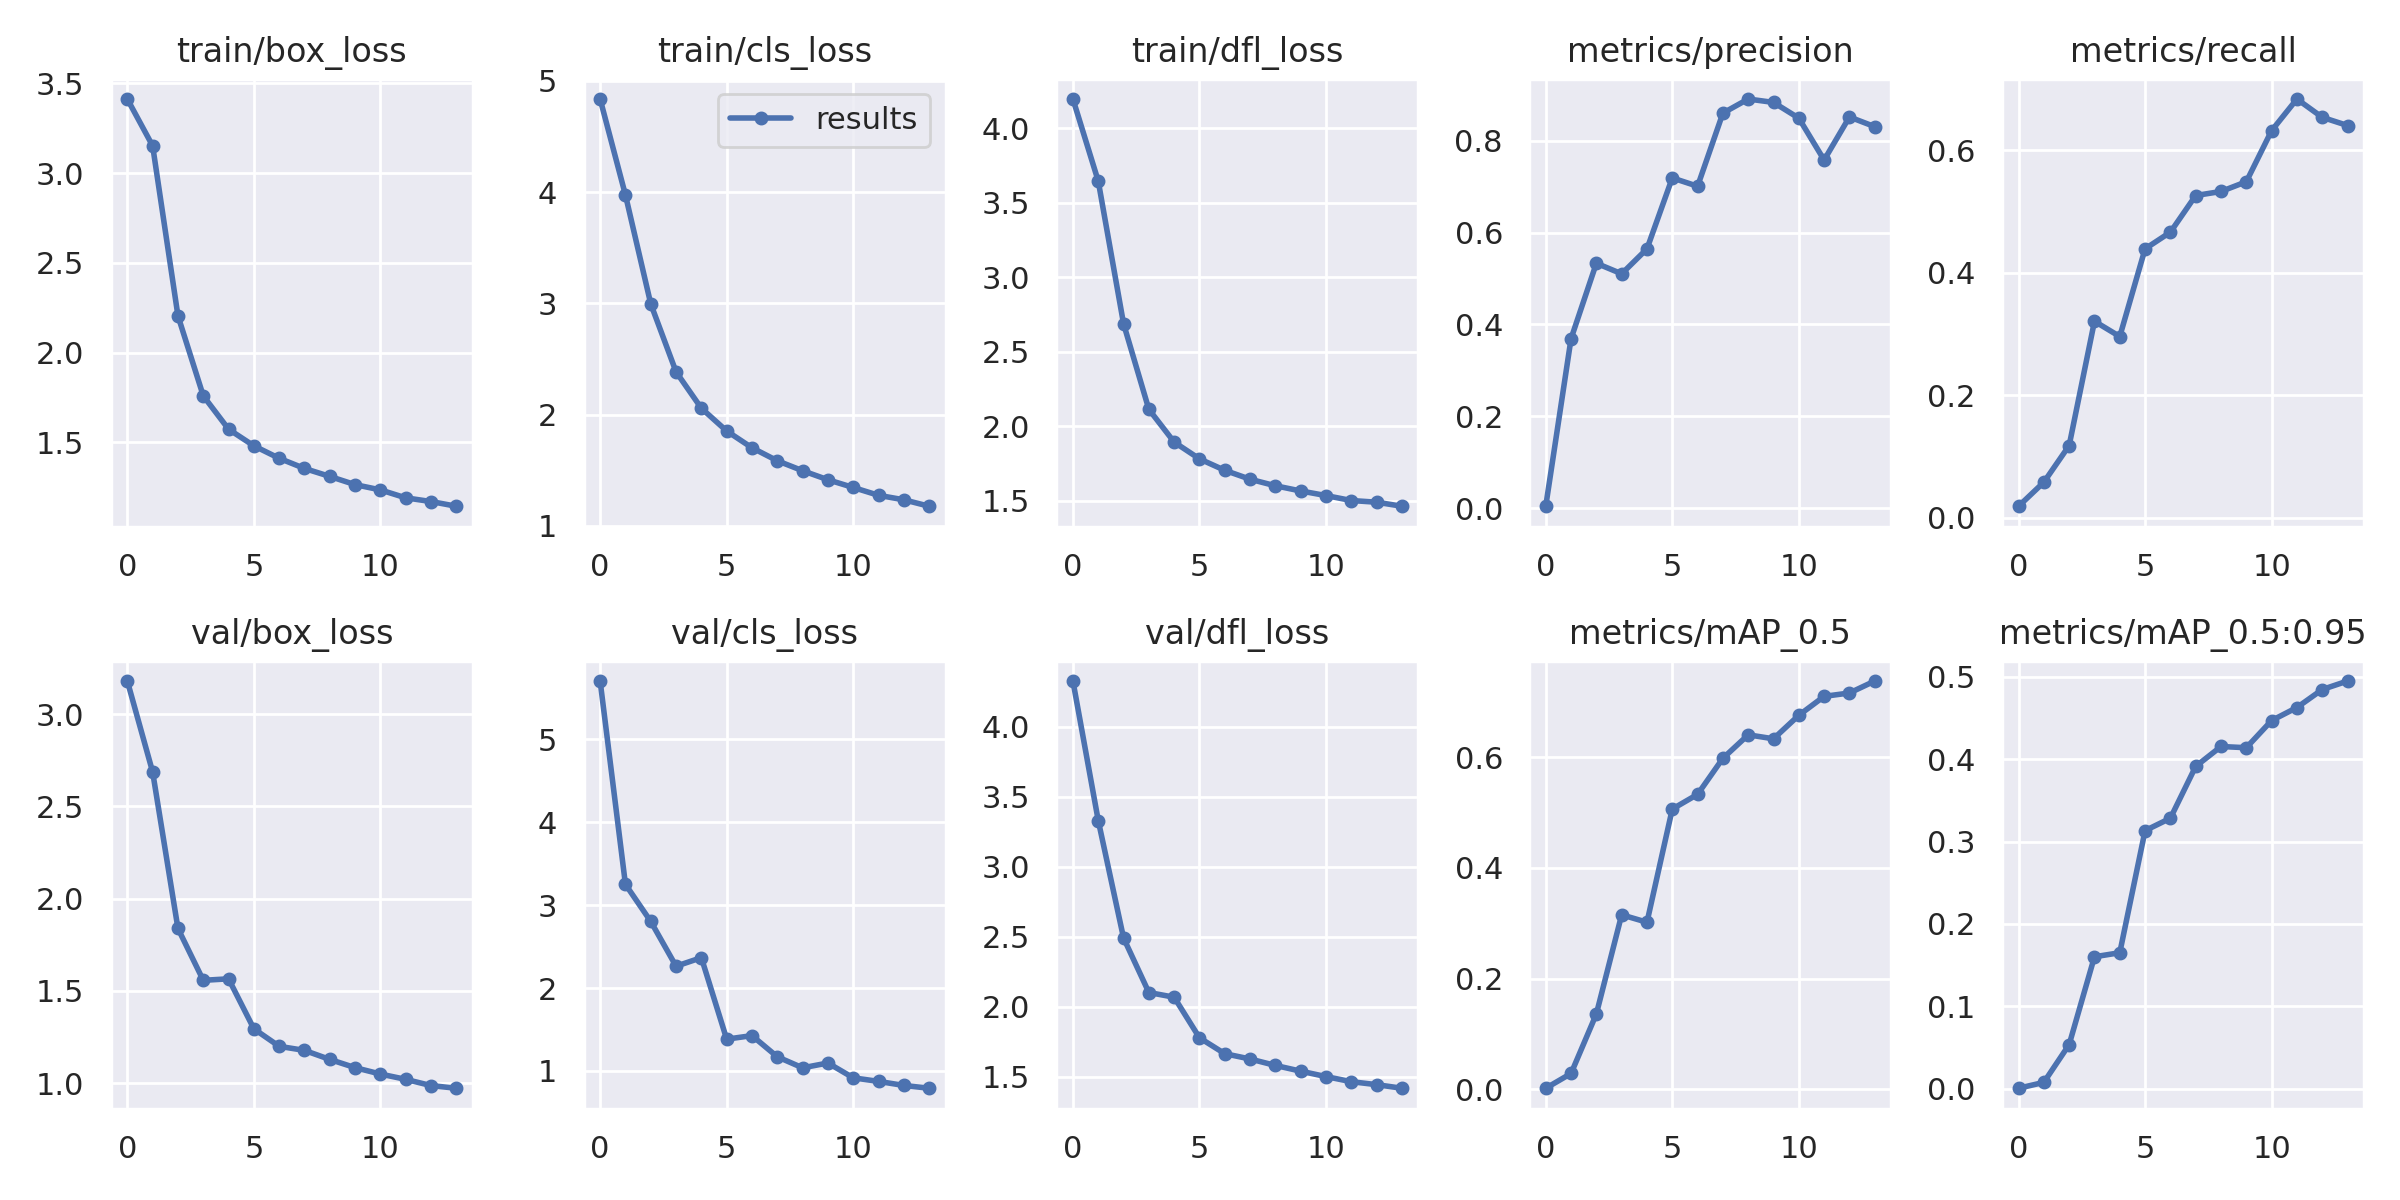

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

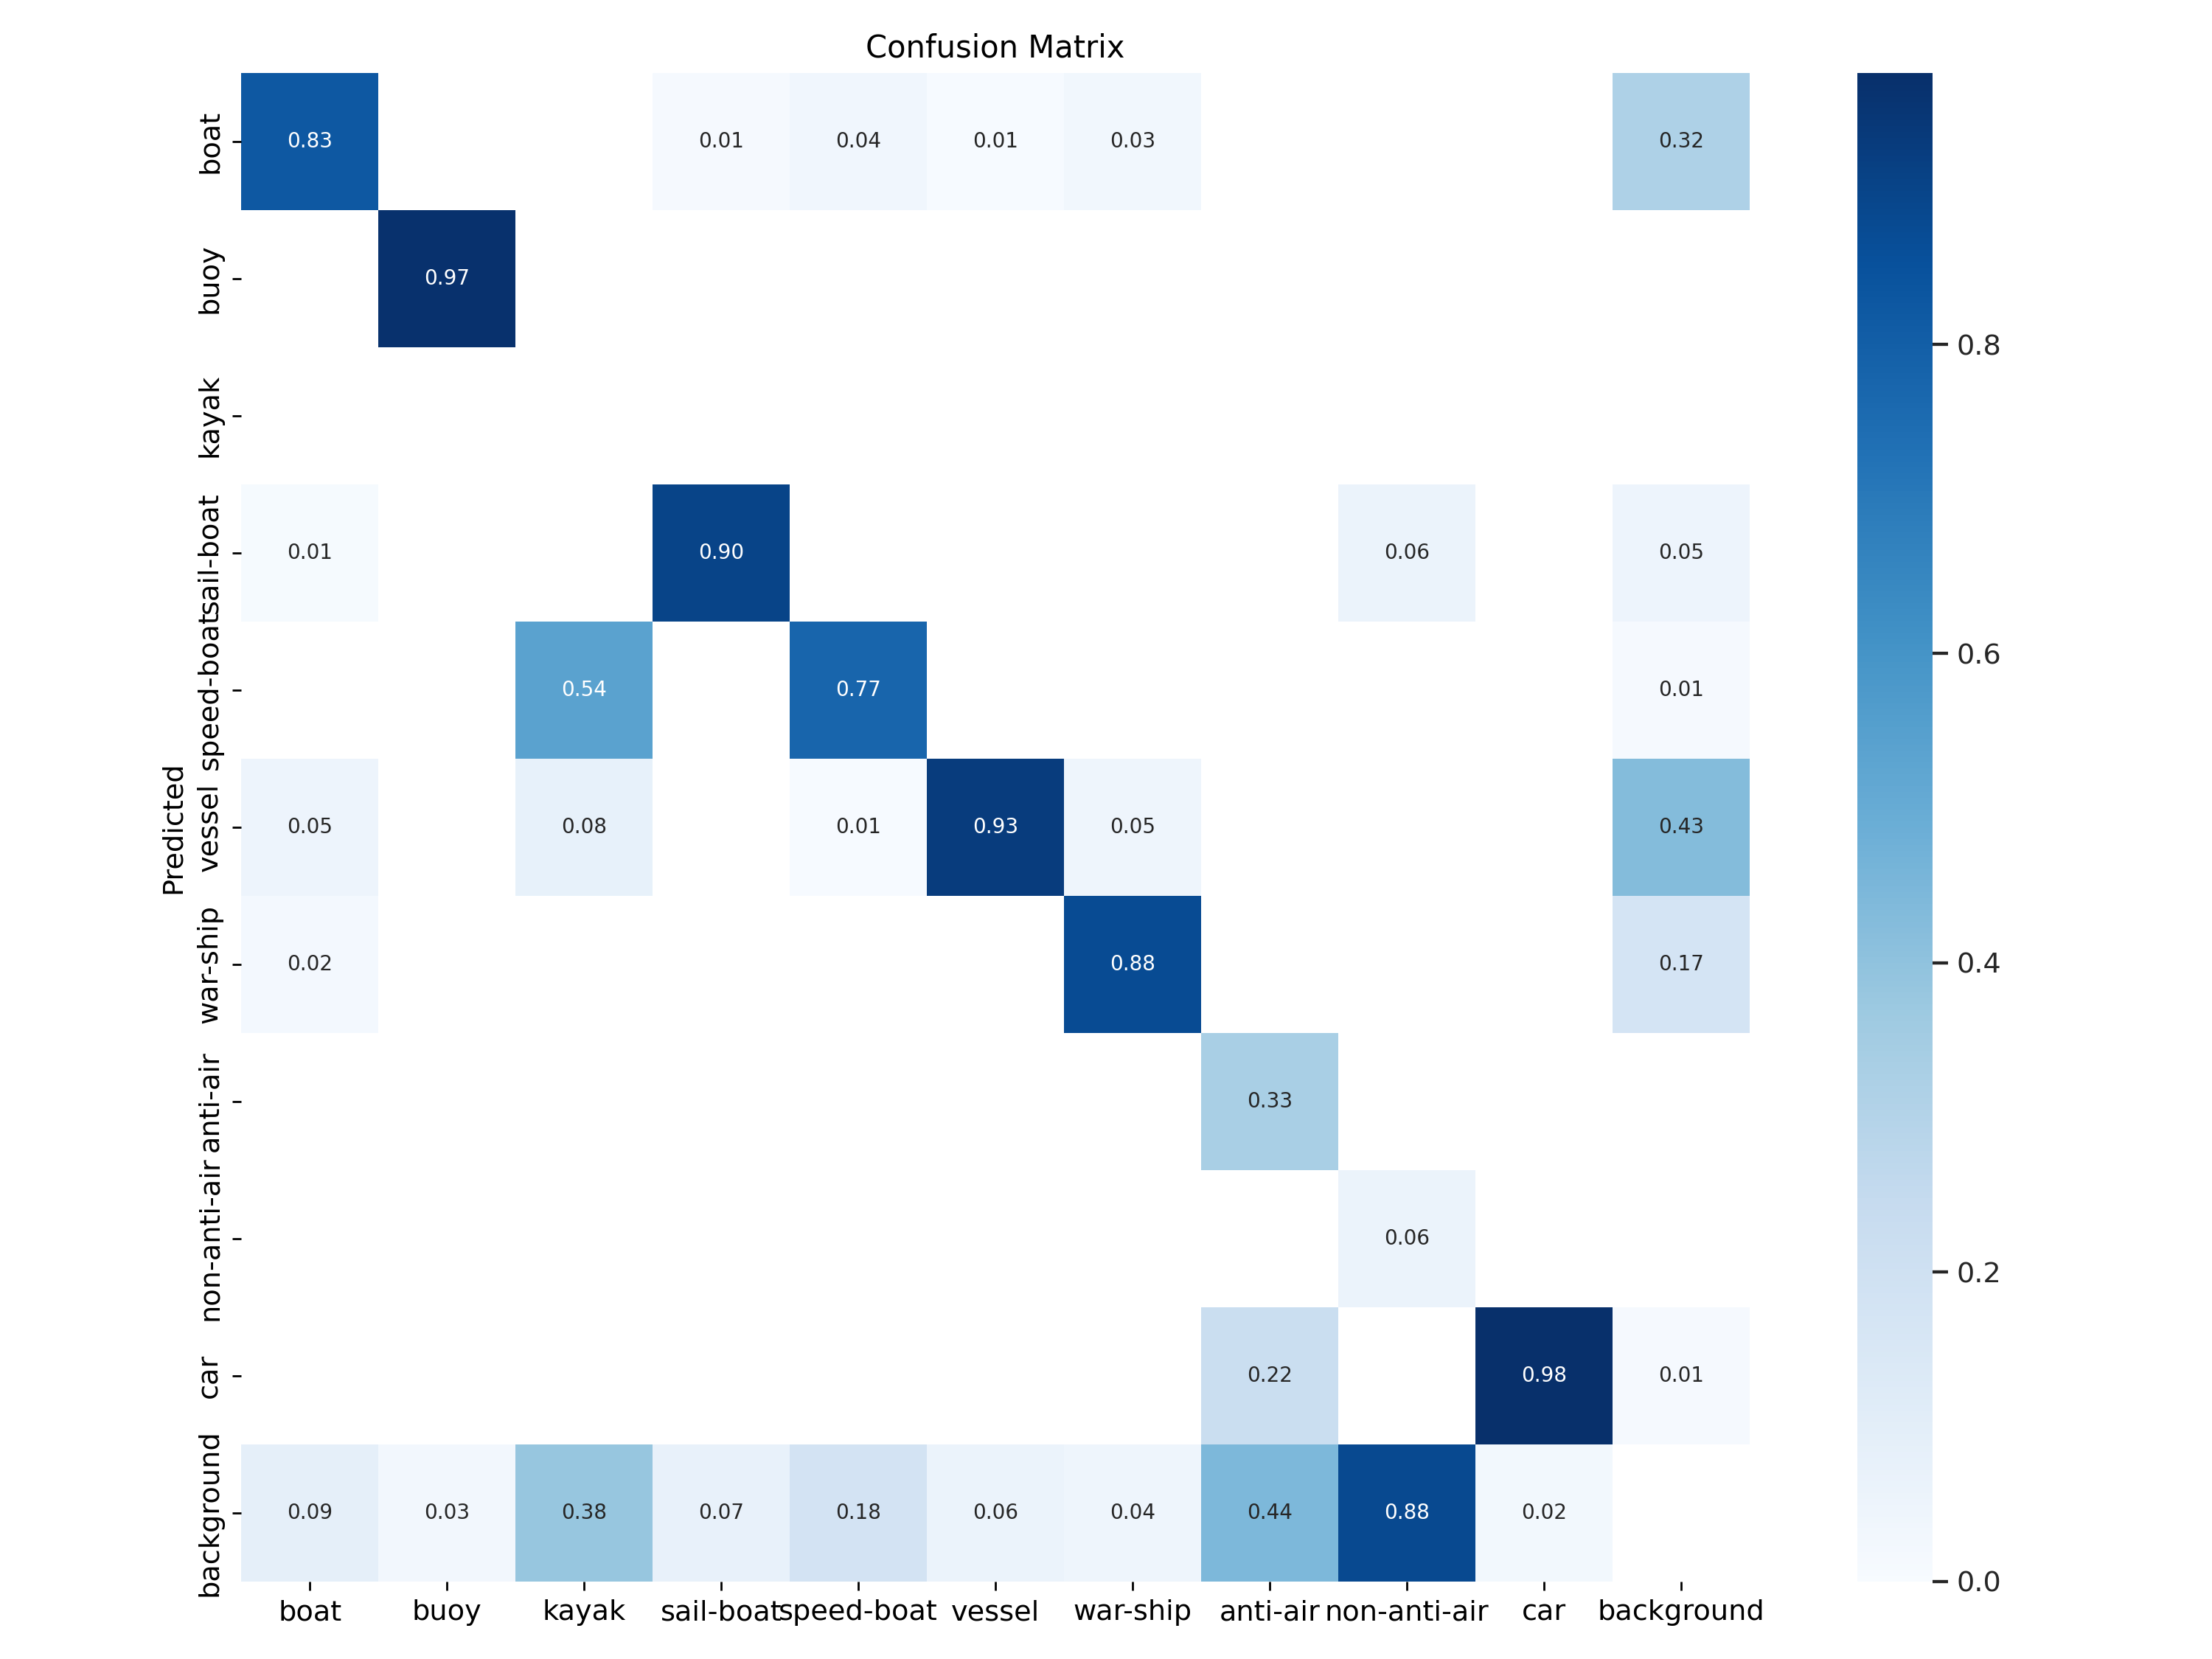

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

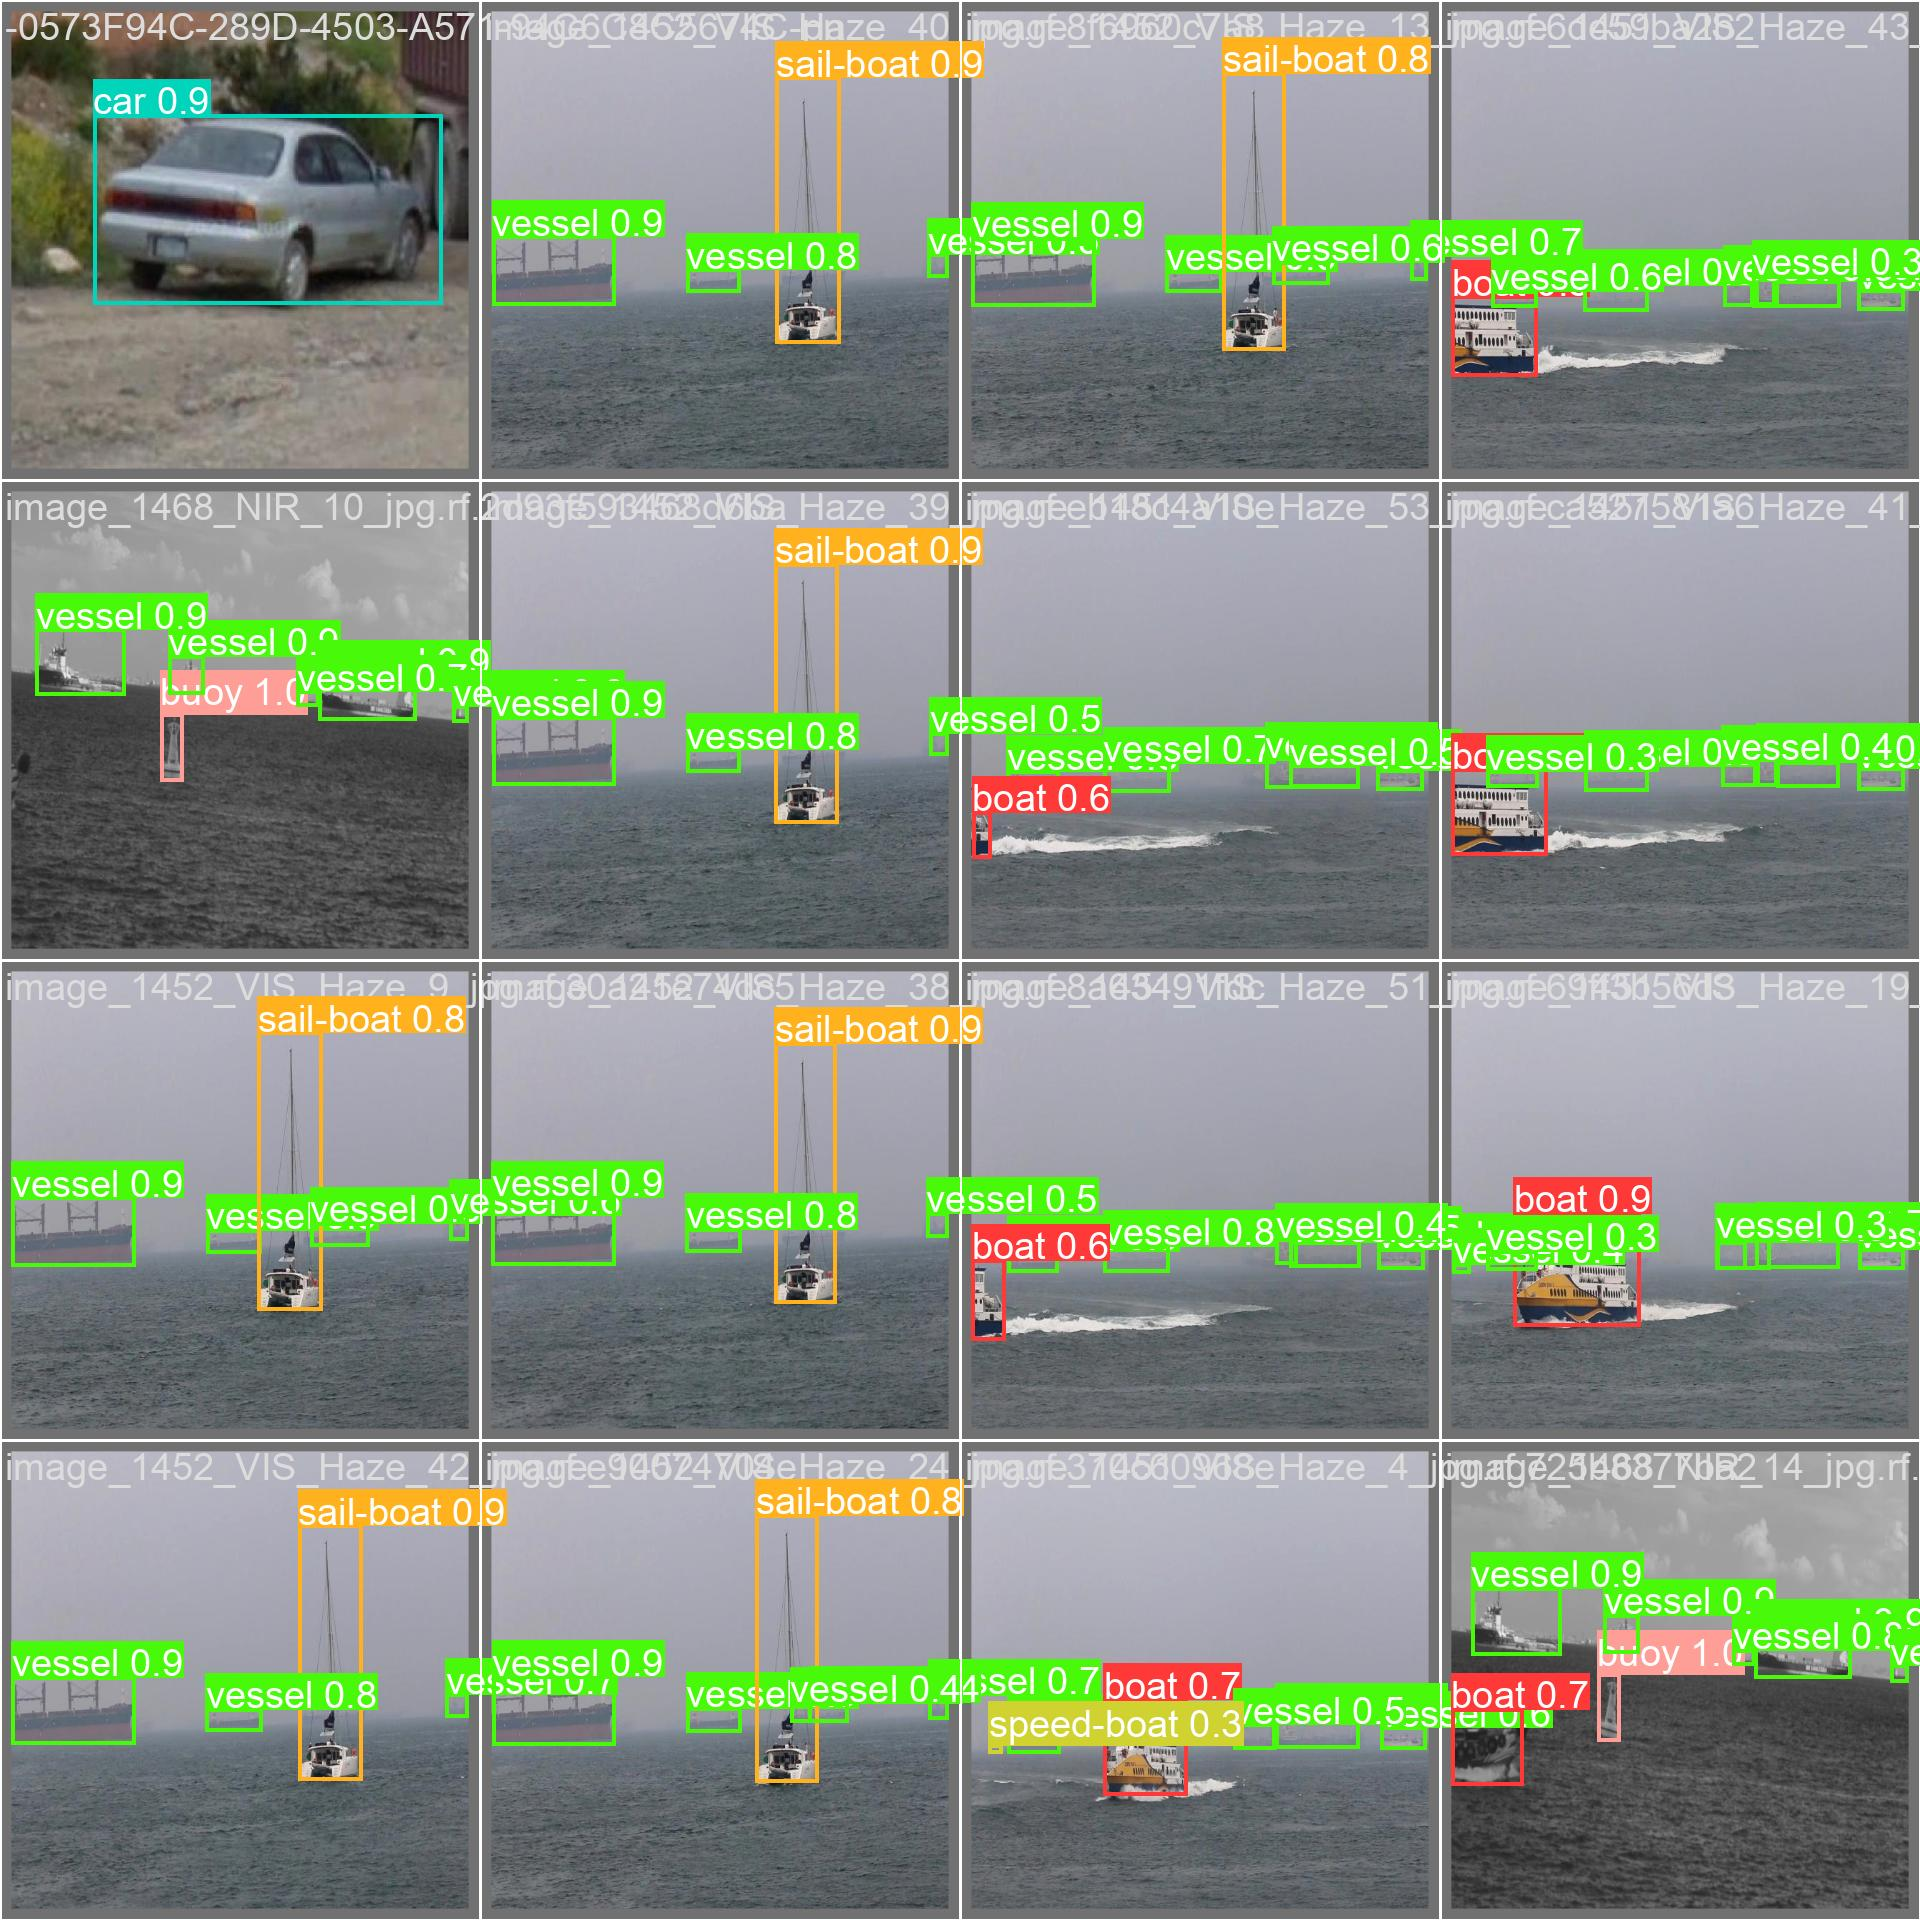

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [7]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/drive/myDrive/checkpoints_/e20-no_pretraining-last.pt

Traceback (most recent call last):
  File "/content/yolov9/val.py", line 388, in <module>
    opt = parse_opt()
  File "/content/yolov9/val.py", line 347, in parse_opt
    opt.data = check_yaml(opt.data)  # check YAML
  File "/content/yolov9/utils/general.py", line 452, in check_yaml
    return check_file(file, suffix)
  File "/content/yolov9/utils/general.py", line 478, in check_file
    assert len(files), f'File not found: {file}'  # assert file was found
AssertionError: File not found: {dataset.location}/data.yaml


## Inference with Custom Model

In [13]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights /content/drive/MyDrive/checkpoints_/e20-no_pretraining-last.pt \
--source /content/images

detect: weights=['/content/drive/MyDrive/checkpoints_/e20-no_pretraining-last.pt'], source=/content/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25418670 parameters, 0 gradients, 102.5 GFLOPs
image 1/2 /content/images/1.jpeg: 640x480 1 war-ship, 204.8ms
image 2/2 /content/images/2.jpeg: 384x640 1 boat, 1 sail-boat, 3 war-ships, 154.4ms
Speed: 0.6ms pre-process, 179.6ms inference, 547.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

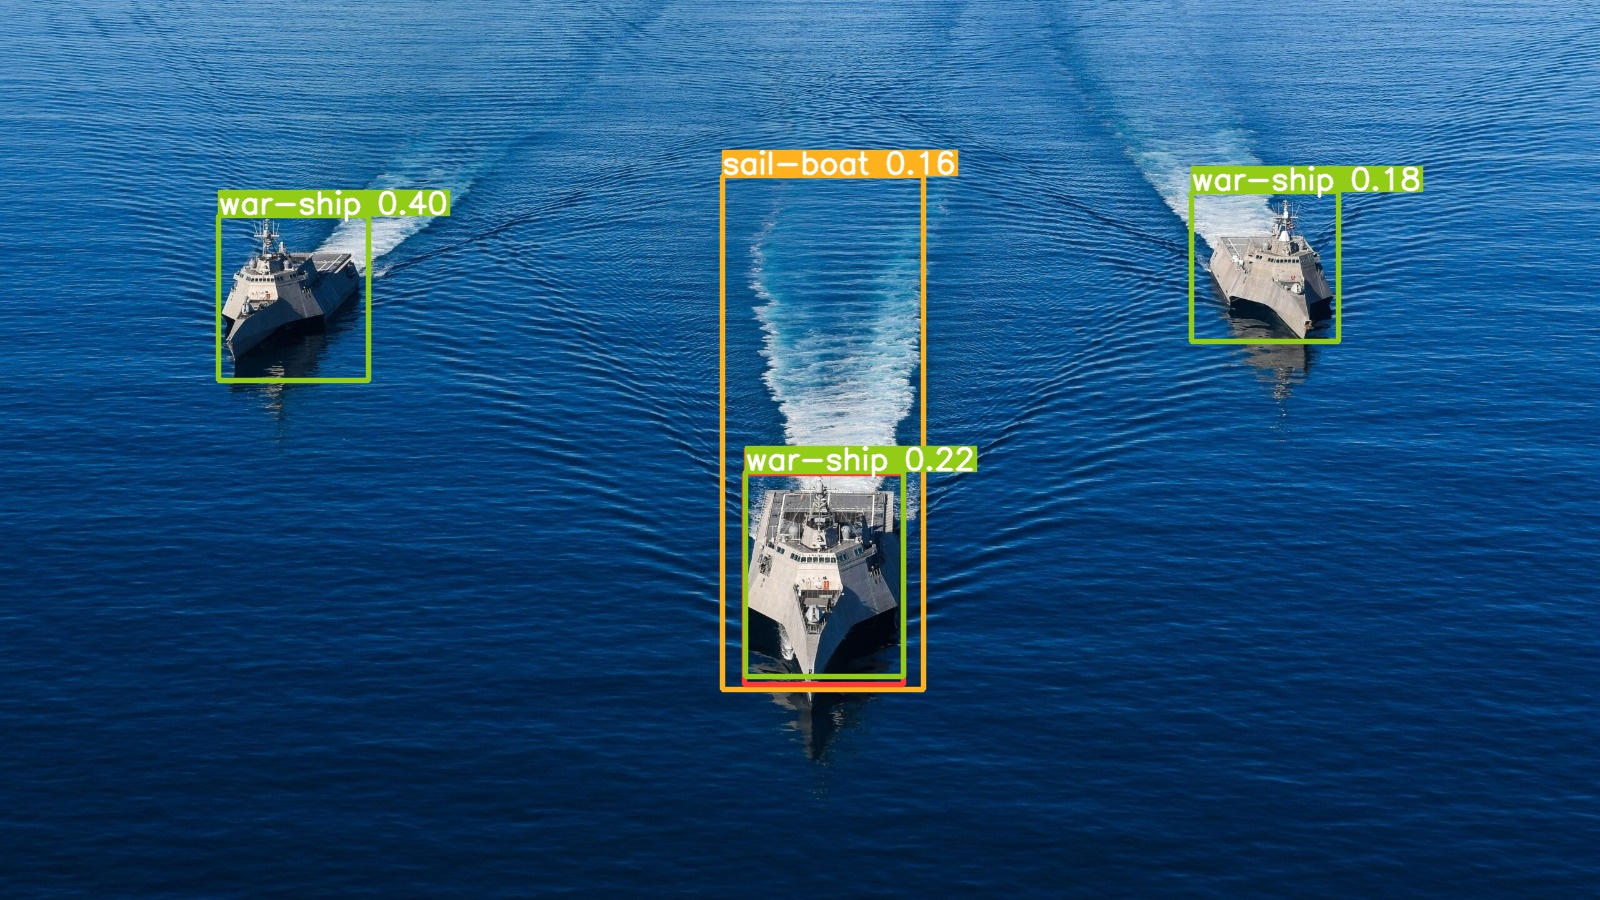

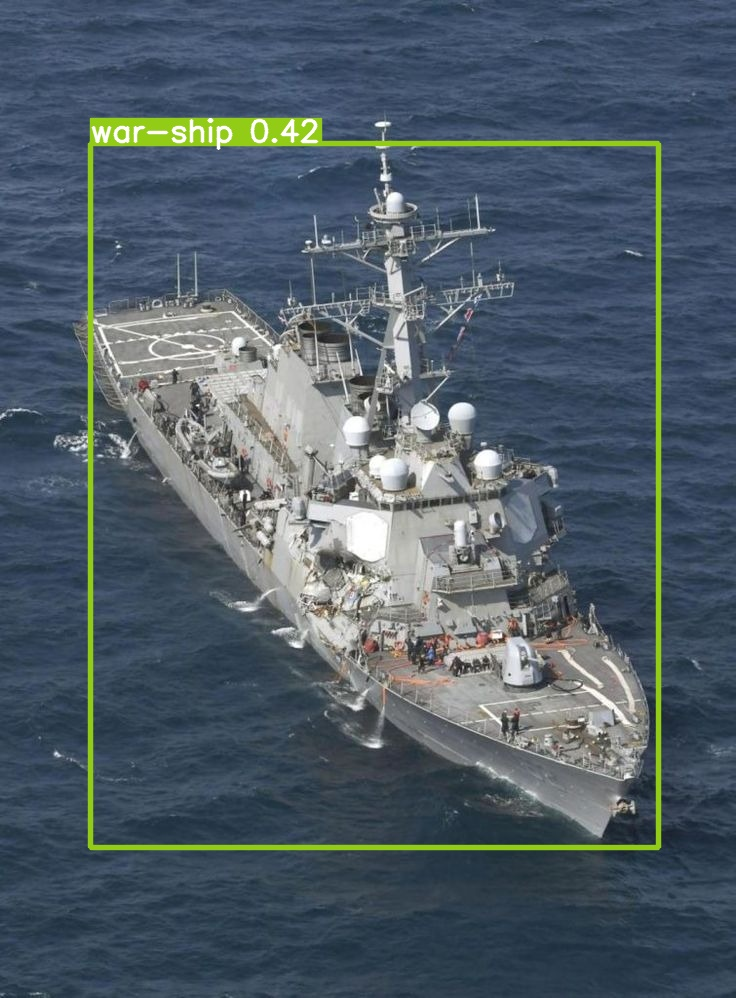

In [17]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'/content/yolov9/runs/detect/exp6/*.*')[:]:
      display(Image(filename=image_path, width=600))

In [ ]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights /content/drive/MyDrive/e20-no_pretraining-best.pt \
--source /content/data

detect: weights=['/content/drive/MyDrive/checkpoints/44_epochs-0.8094-0.5255-1.196.pt'], source=/content/data, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25416357 parameters, 0 gradients, 102.5 GFLOPs
image 1/14 /content/data/1.jpg: 448x640 2 boats, 1 war-ship, 118.1ms
image 2/14 /content/data/10.jpg: 448x640 3 sail-boats, 39.5ms
image 3/14 /content/data/11.webp: 320x640 1 boat, 1 speed-boat, 6 vessels, 3 war-ships, 97.0ms
image 4/14 /content/data/15.jpg: 416x640 1 sail-boat, 94.5ms
image 5/14 /content/data/16.webp: 

In [6]:
!python detect.py \
--img 640 --conf 0.2 --device 0 \
--class 0 1 2 3 4 5 6 7 8 \
--weights /content/drive/MyDrive/checkpoints_/44_epochs-0.8094-0.5255-1.196.pt \
--source /content/2.mp4

detect: weights=['/content/drive/MyDrive/checkpoints_/44_epochs-0.8094-0.5255-1.196.pt'], source=/content/2.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8], agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25416357 parameters, 0 gradients, 102.5 GFLOPs
[aac @ 0x5d210eb99940] Input buffer exhausted before END element found
video 1/1 (1/294) /content/2.mp4: 640x384 1 war-ship, 234.7ms
video 1/1 (2/294) /content/2.mp4: 640x384 1 war-ship, 32.5ms
video 1/1 (3/294) /content/2.mp4: 640x384 1 war-ship, 32.9ms
video 1/1 (4/294) /content/2.mp4: 640x384

In [7]:
!mv /content/yolov9/runs/detect/exp/2.mp4 /content/drive/MyDrive/video.mp4